In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import osmnx as ox
import contextily as ctx
import networkx as nx
import folium

In [4]:
postnl_distribution = pd.read_csv('/Users/cmartens/Documents/thesis_cf_martens/distribution_centers/data/postnl_depots_adjusted.csv')

In [5]:
# Only keep the depotLive = True columns
postnl_distribution = postnl_distribution[postnl_distribution['depotLive'] == True]


In [6]:
# Only keep the Type = 'PostNL Sorteercentrum Pakketten'
postnl_distribution = postnl_distribution[postnl_distribution['Type'] == 'PostNL Sorteercentrum Pakketten']

In [7]:
# Only keep the columns that are needed
postnl_distribution = postnl_distribution[['depotAbbreviation', 'depotGpsLatitude', 'depotGpsLongitude', 'depotCity', 'depotId']]

In [8]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(postnl_distribution['depotGpsLongitude'], postnl_distribution['depotGpsLatitude'])]
postnl_distribution = postnl_distribution.drop(['depotGpsLongitude', 'depotGpsLatitude'], axis=1)
gdf_distribution = gpd.GeoDataFrame(postnl_distribution, crs=4326, geometry=geometry)

In [9]:
gdf_distribution['type'] = 'distribution'
gdf_distribution.rename(columns={"depotId": "id"}, inplace=True)

In [10]:
gdf_distribution

,depotAbbreviation,depotCity,id,geometry,type
0,ALR-WV,Almere,210406,POINT (5.31543 52.31895),distribution
2,AL-EW,Alphen aan den Rijn (NLI),223153,POINT (4.67796 52.11402),distribution
3,AMF-WT,Amersfoort,160664,POINT (5.42377 52.1656),distribution
4,ASD-JOA,Amsterdam-Zuidoost,208802,POINT (4.92542 52.32372),distribution
5,AP-OAW,Apeldoorn,208683,POINT (5.96531 52.17538),distribution
8,BORN-HN,Born,157653,POINT (5.81362 51.06887),distribution
9,BD-SB,Breda,157648,POINT (4.75966 51.60316),distribution
10,HT-KK,Den Bosch,156836,POINT (5.27183 51.70321),distribution
11,HBD-H,Den Hoorn,161099,POINT (4.31969 52.00468),distribution
13,DDT-ZS,Dordrecht,211188,POINT (4.641 51.77479),distribution


In [11]:
gdf_distribution.to_file("/Users/cmartens/Documents/thesis_cf_martens/distribution_centers/output/postnl_distribution_cleaned.json")

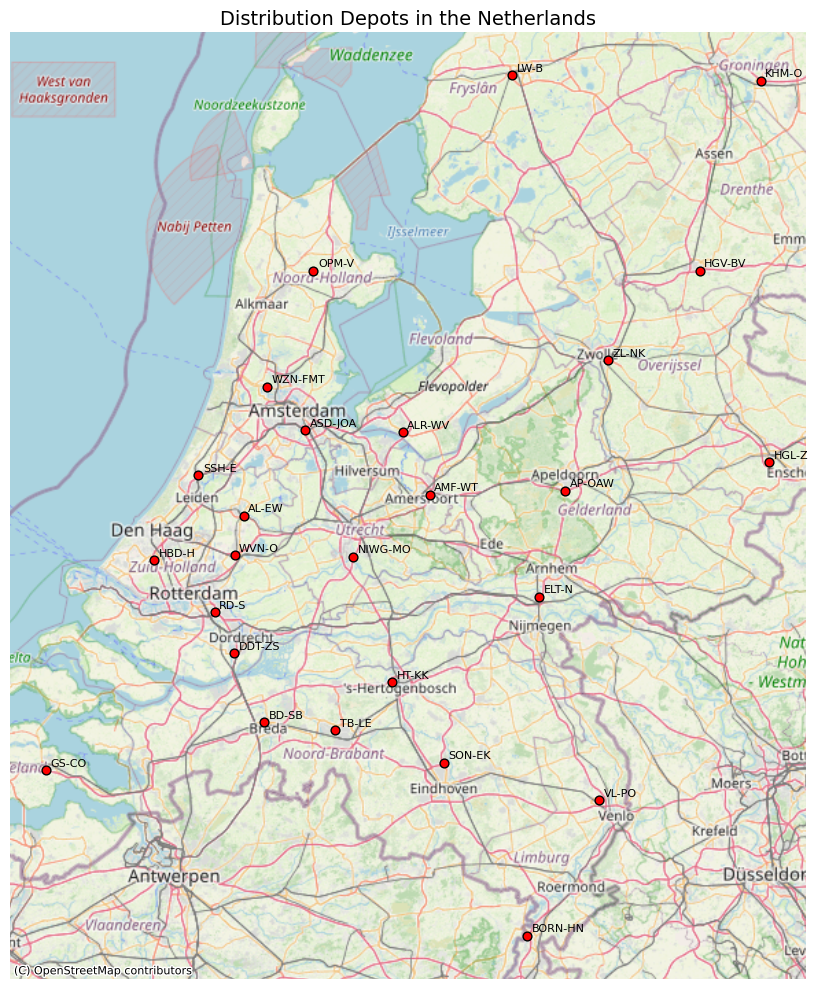

In [12]:
gdf = gdf_distribution.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="red", markersize=40, edgecolor="black")

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["depotAbbreviation"]):
    ax.text(x + 2000, y + 2000, label, fontsize=8)

ax.set_axis_off()
plt.title("Distribution Depots in the Netherlands", fontsize=14)
plt.tight_layout()
plt.show()